## Hypothesis ##
Given the current statistics of this 2024-2025 La Liga season, we want to predict:

- The team that will win the La Liga title
- The teams that will qualify for the European Competitions (Champions League, Europa League, and Conference League)
- Who are the 3 teams that will be relegated to the second division

In [3]:
import pandas as pd

full_data = pd.read_csv("la_liga_data.csv")

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
print(full_data.shape)
full_data.tail(20)

(220, 21)


,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,xg,xga,xgd,xgd/90,season,last_5
200,1,Barcelona,27,19,3,5,75,27,48,60,2.22,45119.0,Robert Lewandowski - 22,Iñaki Peña,NaN,64.9,29.9,35.0,1.30,2024,W W W W W
201,2,Real Madrid,28,18,6,4,59,27,32,60,2.14,69474.0,Kylian Mbappé - 20,Thibaut Courtois,NaN,53.0,28.7,24.4,0.87,2024,D W L W W
202,3,Atlético Madrid,28,16,8,4,46,22,24,56,2.00,61970.0,"Alexander Sørloth, Julián Álvarez - 11",Jan Oblak,NaN,45.3,26.4,18.9,0.68,2024,D W W L L
203,4,Athletic Club,28,14,10,4,46,24,22,52,1.86,48344.0,Oihan Sancet - 13,Julen Agirrezabala,NaN,42.5,25.6,16.9,0.61,2024,D W L D W
204,5,Villarreal,27,12,8,7,49,38,11,44,1.63,18544.0,Ayoze Pérez - 11,Diego Conde,NaN,47.8,30.3,17.5,0.65,2024,W D W L L
205,6,Betis,28,12,8,8,38,35,3,44,1.57,51110.0,Giovani Lo Celso - 7,Rui Silva,NaN,43.7,35.3,8.4,0.30,2024,W W W W W
206,7,Mallorca,28,11,7,10,28,34,-6,40,1.43,18781.0,Vedat Muriqi - 7,Dominik Greif,NaN,32.8,30.8,2.0,0.07,2024,W D D D W
207,8,Celta Vigo,28,11,6,11,41,41,0,39,1.39,22082.0,Iago Aspas - 8,Vicente Guaita,NaN,38.9,30.2,8.6,0.31,2024,D W D W W
208,9,Rayo Vallecano,28,9,10,9,31,31,0,37,1.32,13131.0,Jorge de Frutos - 4,Augusto Batalla,NaN,34.3,32.5,1.9,0.07,2024,L L D L D
209,10,Sevilla,28,9,9,10,32,37,-5,36,1.29,35768.0,Dodi Lukebakio - 11,Ørjan Nyland,NaN,29.4,37.3,-8.0,-0.28,2024,W D D W L


## Data Exploration ##

In [5]:
# Top 3 finishes by each team in La Liga over the 11 seasons
full_data['squad'].groupby(full_data['rk']).value_counts().head(10)

rk  squad          
1   Barcelona          6
    Real Madrid        4
    Atlético Madrid    1
2   Real Madrid        5
    Barcelona          4
    Atlético Madrid    2
3   Atlético Madrid    7
    Real Madrid        2
    Barcelona          1
    Girona             1
Name: count, dtype: int64

In [6]:
import plotly.express as px

#Get the top 3 teams only 
ranking_counts = full_data['squad'].groupby(full_data['rk']).value_counts().reset_index(name='count')

#Ensure we only keep the top 3 rankings
ranking_counts = ranking_counts[ranking_counts['rk'].isin([1,2,3])]

#Plot
fig = px.bar(ranking_counts, x='squad', y='count', color='rk',
             barmode='group',
             title='Top 3 Finishes by Team and Rank (Last 10 Years)',
             labels={'squad': 'Team', 'count': 'Finish', 'rk': 'Rank'})

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [7]:
# Filter for winning teams from the past 10 years, excluding the current season
winning_teams_past_10 = full_data[(full_data["rk"] == 1) & (full_data["season"] < 2024)]

# Compute the average points per match for the past 10 winning teams
avg_pts_mp_winners = winning_teams_past_10["pts/mp"].mean()

print(f"Average Pts/MP for past 10 winning teams (excluding this year): {avg_pts_mp_winners:.2f}")

Average Pts/MP for past 10 winning teams (excluding this year): 2.37


In [8]:
# Convert 'rk' to binary (1 if team won the league, 0 otherwise)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

# Filter only champion teams
champions_only = full_data[full_data["is_champion"] == 1]


full_data.head(2)

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,xg,xga,xgd,xgd/90,season,last_5,is_champion
0,1,Barcelona,38,30,4,4,110,21,89,94,2.47,77632.0,Lionel Messi - 43,Claudio Bravo,→ Champions League via Champions League win,NaN,NaN,NaN,NaN,2014,NaN,1
1,2,Real Madrid,38,30,2,6,118,38,80,92,2.42,73545.0,Cristiano Ronaldo - 48,Iker Casillas,→ Champions League via league finish,NaN,NaN,NaN,NaN,2014,NaN,0


In [9]:
# Calculate the mean of 'pts/mp'
mean_pts_mp = champions_only["pts/mp"].mean()

print(f"Mean of 'pts/mp': {mean_pts_mp:.2f}")

Mean of 'pts/mp': 2.35


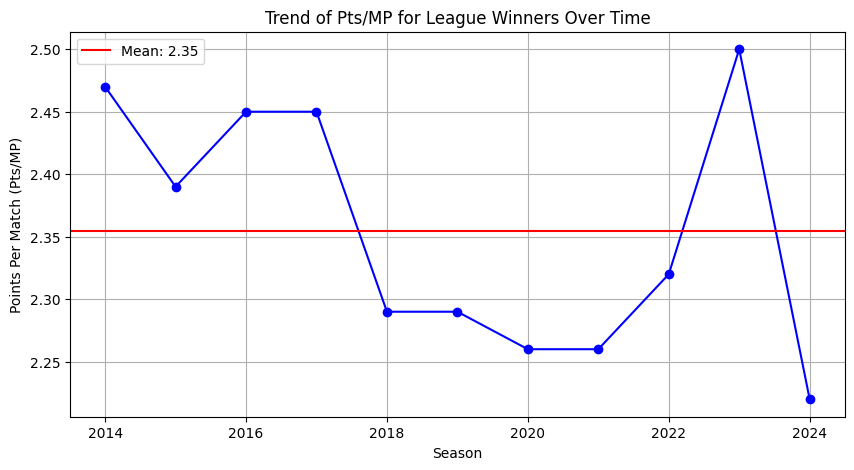

In [10]:
import matplotlib.pyplot as plt

# Plot trend of 'pts/mp' for champions over the years
plt.figure(figsize=(10, 5))
plt.plot(champions_only["season"], champions_only["pts/mp"], marker="o", linestyle="-", color="b")
plt.axhline(y=mean_pts_mp, color='r', linestyle='-', label=f'Mean: {mean_pts_mp:.2f}')
plt.xlabel("Season")
plt.ylabel("Points Per Match (Pts/MP)")
plt.title("Trend of Pts/MP for League Winners Over Time")
plt.grid(True)
plt.legend()
plt.show()

### ML Modelings and Predictions ###

In [1]:
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.preprocessing import StandardScaler     # To normalize our features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, log_loss  # Model evaluation
from sklearn.model_selection import cross_val_score  # For cross-validation
import pandas as pd                                  # For data manipulation
import numpy as np                                   # For numerical operations

In [11]:
# Calculate how many games each team has left to play (La Liga has 38 total games)
full_data["games_left"] = 38 - full_data["mp"]

# Estimate the final number of points if each team keeps their current pace
full_data["projected_pts"] = full_data["pts"] + full_data["games_left"] * full_data["pts/mp"]

# Create a binary column to indicate if a team was champion that season (1 = champion, 0 = not)
full_data["is_champion"] = (full_data["rk"] == 1).astype(int)

In [15]:
# Define the features (inputs) the model will use
features = ["pts/mp", "gd", "w", "l", "projected_pts"]

# Create training data: all seasons before 2024
df_train = full_data[full_data["season"] < 2024]

# Create testing data: only the 2024 season (current one)
df_test = full_data[full_data["season"] == 2024].copy()

# Define feature matrix (X) and target variable (y)
X_train = df_train[features]
y_train = df_train["is_champion"]
X_test = df_test[features]

In [16]:
# Initialize the model with 200 trees and a fixed random state for reproducibility
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [17]:
# Predict binary outcomes (0 or 1) on training set
train_preds = model.predict(X_train)

# Predict probabilities of being champion
train_probs = model.predict_proba(X_train)[:, 1]  # Only the prob of class 1

In [18]:
# Compute accuracy
accuracy = accuracy_score(y_train, train_preds)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_train, train_probs)

# Compute log loss (lower is better)
logloss = log_loss(y_train, train_probs)

# Print performance metrics
print(f"\nModel Performance on Historical Data")
print(f"Accuracy: {accuracy:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print(f"Log Loss: {logloss:.3f}")

# Print detailed classification performance
print("\nClassification Report:")
print(classification_report(y_train, train_preds))

# Show confusion matrix (true vs predicted values)
print("Confusion Matrix:")
print(confusion_matrix(y_train, train_preds))


Model Performance on Historical Data
Accuracy: 1.000
ROC AUC Score: 1.000
Log Loss: 0.014

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00        10

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[190   0]
 [  0  10]]


In [20]:
# Predict probability of becoming champion
df_test["win_probability"] = model.predict_proba(X_test)[:, 1]
df_test.head()

,rk,squad,mp,w,d,l,gf,ga,gd,pts,pts/mp,attendance,top_team_scorer,goalkeeper,notes,xg,xga,xgd,xgd/90,season,last_5,is_champion,games_left,projected_pts,win_probability
200,1,Barcelona,27,19,3,5,75,27,48,60,2.22,45119.0,Robert Lewandowski - 22,Iñaki Peña,NaN,64.9,29.9,35.0,1.30,2024,W W W W W,1,11,84.42,0.085
201,2,Real Madrid,28,18,6,4,59,27,32,60,2.14,69474.0,Kylian Mbappé - 20,Thibaut Courtois,NaN,53.0,28.7,24.4,0.87,2024,D W L W W,0,10,81.40,0.015
202,3,Atlético Madrid,28,16,8,4,46,22,24,56,2.00,61970.0,"Alexander Sørloth, Julián Álvarez - 11",Jan Oblak,NaN,45.3,26.4,18.9,0.68,2024,D W W L L,0,10,76.00,0.010
203,4,Athletic Club,28,14,10,4,46,24,22,52,1.86,48344.0,Oihan Sancet - 13,Julen Agirrezabala,NaN,42.5,25.6,16.9,0.61,2024,D W L D W,0,10,70.60,0.010
204,5,Villarreal,27,12,8,7,49,38,11,44,1.63,18544.0,Ayoze Pérez - 11,Diego Conde,NaN,47.8,30.3,17.5,0.65,2024,W D W L L,0,11,61.93,0.000


In [21]:
# Normalize the probabilities so that all teams add up to 100%
df_test["win_probability (%)"] = df_test["win_probability"] / df_test["win_probability"].sum() * 100

# Round the values for better readability
df_test["win_probability (%)"] = df_test["win_probability (%)"].round(3)

In [22]:
# Sort the test DataFrame by win probability descending
df_test = df_test.sort_values("projected_pts", ascending=False)
print("\nChampionship Win Probabilities (2024):")
df_test[["squad", "pts", "projected_pts", "pts/mp", "gd", "games_left", "win_probability (%)"]]


Championship Win Probabilities (2024):


,squad,pts,projected_pts,pts/mp,gd,games_left,win_probability (%)
200,Barcelona,60,84.42,2.22,48,11,70.833
201,Real Madrid,60,81.40,2.14,32,10,12.500
202,Atlético Madrid,56,76.00,2.00,24,10,8.333
203,Athletic Club,52,70.60,1.86,22,10,8.333
204,Villarreal,44,61.93,1.63,11,11,0.000
205,Betis,44,59.70,1.57,3,10,0.000
206,Mallorca,40,54.30,1.43,-6,10,0.000
207,Celta Vigo,39,52.90,1.39,0,10,0.000
208,Rayo Vallecano,37,50.20,1.32,0,10,0.000
210,Getafe,36,48.90,1.29,2,10,0.000


In [24]:
import plotly.express as px

# Sort by projected_pts (descending)
df_test_sorted = df_test.sort_values("projected_pts", ascending=False)

# Plot bar chart
fig = px.bar(
    df_test_sorted,
    x="squad",
    y="win_probability (%)",
    color_discrete_sequence=["#1f77b4"],
    title="Championship Win Probabilities (2024-2025 Season)",
    labels={"squad": "Team", "win_probability (%)": "Win Probability (%)"},
    template="plotly_white"
)

# Improve layout
fig.update_layout(
    xaxis_title="Team",
    yaxis_title="Win Probability (%)",
    xaxis_tickangle=-45,
    bargap=0.3,
    title_x=0.5
)

fig.show()

### Key Take Aways ###
- Based on the analysis, FC Barcelona has a 70.83% chance of winning the league this season followed by Real Madrid and Atlético Madrid. 

- Teams that will see European Competitions next season:
    - Champions League 
        * Barcelona 
        * Real Madrid 
        * Atlético Madrid
        * Athletic Club 
        * Villarreal
    - Europa League 
        * Betis 
        * Mallorca
    - Coference League 
        * Rayo Vallecano 
- Teams that have the potential of being relegated this season:

    * Leganés
    * Las Palmas
    * Valladolid
